# Projeto 3 
## Gianluca e Marcelo - 2A

### Introdução
Esse projeto tem como objetivo a construção de uma análise de regressão. Isso significa estudar a influência de variáveis regressoras na variável resposta. O foco do grupo foi o indicador **nível de percepção de corrupção**. Dessa forma, tivemos de escolher três outros indicadores como variáveis regressoras e uma pergunta que regeria todo o processo:

#### O nível de percepção de corrupção é afetado pelo nível de desenvolvimento de um país?

O critério de escolha desses indicadores foi analisar um gráfico gerado pelo Gapminder, com eixo X como variável regressora e eixo Y como variável resposta. Caso o gráfico apresentasse uma tendência linear, significando alto coeficiente de correlação, o indicador em questão seria selecionado.

Essas foram as variáveis escolhidas:
<img src="var1.png">
<img src="var2.png">
<img src="var3.png">

**Nota:** o indicador *babies per woman* não foi utilizado, pois quando fomos baixar seus dados, percebemos que ele não se encontrava disponível no site do Gapminder. Dessa forma, tentamos utilizar um semelhante,*fertility*. Entretanto, ao analisá-lo em conjunto com as outras duas variáveis, notamos que ele não estava "sincronizado" com as outras duas variáveis (*gdp* e *life expectancy*).

### Estrutura da análise
Para o projeto, realizamos dois tipos de análise: uma descritiva e uma de regressão. A descritiva tem como objetivo quantificar a força da relação linear existente entre a variável resposta e as regressoras, através de suas correlações. A de regressão tem como objetivo modelar e explicar a forma dessa relação quantitativamente.

### Análise Descritiva

In [24]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/Marcelo/Google Drive/Ciência dos Dados/GithubRepo/Projeto3


In [25]:
gdp = pd.read_excel('gdp.xlsx',index_col=0)
life = pd.read_excel('life.xlsx',index_col=0)
corruption = pd.read_excel('corruption.xlsx',index_col=0)



In [48]:
dados = pd.DataFrame()

dados['gdp'] = gdp["2009_fix"]
dados['life'] = life["2009_fix"]
dados["corruption"] = corruption["2009_fix"]

#Retirar NaN
dados=dados[~np.isnan(dados.gdp)]
dados=dados[~np.isnan(dados.life)]
dados=dados[~np.isnan(dados.corruption)]
dados['lnGdp'] = np.log(dados['gdp'])
dados.shape

(172, 4)

In [27]:
# dados = gdp.join(fertility,how='outer', lsuffix='_caller', rsuffix='_other')
dados.head()

,gdp,life,corruption,lnGdp
GDP per capita,,,,
Afghanistan,1548,53.3,1.4,7.344719
Albania,8994,77.0,3.3,9.104313
Algeria,12285,75.7,2.9,9.416134
Angola,7039,57.1,1.9,8.859221
Argentina,14605,75.6,2.9,9.589119


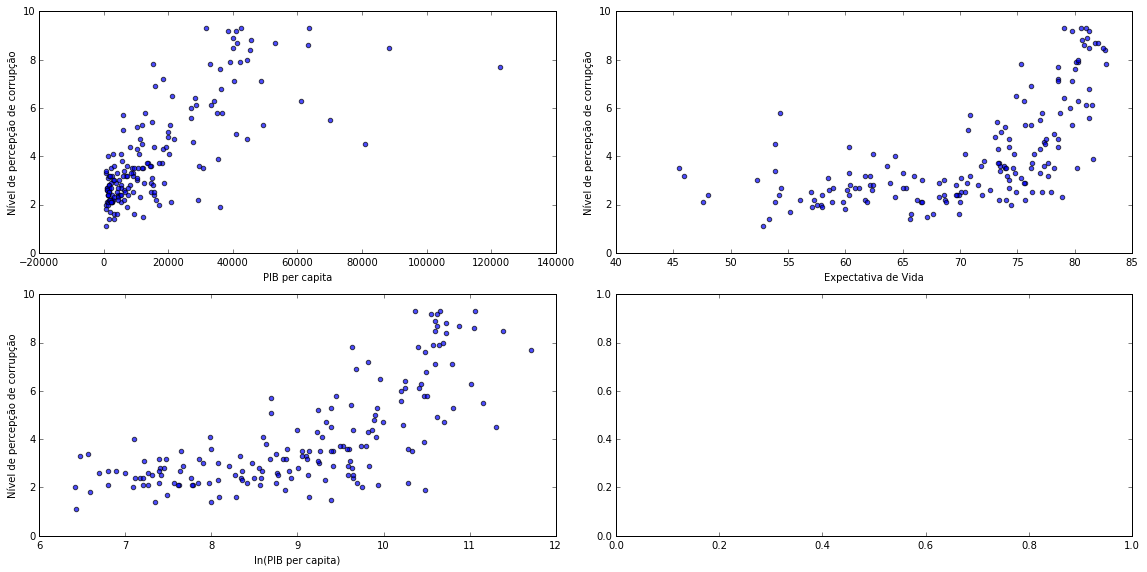

In [28]:
f, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].scatter(dados.gdp, dados.corruption, alpha=0.7)  # Plot the raw data
ax[0,0].set_xlabel("PIB per capita")
ax[0,0].set_ylabel("Nível de percepção de corrupção")

ax[0,1].scatter(dados.life, dados.corruption, alpha=0.7)  # Plot the raw data
ax[0,1].set_xlabel("Expectativa de Vida")
ax[0,1].set_ylabel("Nível de percepção de corrupção")

ax[1,0].scatter(dados.lnGdp, dados.corruption, alpha=0.7)  # Plot the raw data
ax[1,0].set_xlabel("ln(PIB per capita)")
ax[1,0].set_ylabel("Nível de percepção de corrupção")

plt.tight_layout(1)

In [29]:
dados.corr(method='pearson')

,gdp,life,corruption,lnGdp
gdp,1.000000,0.610866,0.735219,0.832204
life,0.610866,1.000000,0.628758,0.795100
corruption,0.735219,0.628758,1.000000,0.712697
lnGdp,0.832204,0.795100,0.712697,1.000000


### Conclusão da análise descritiva
Analisando a tabela de correlação entre as variáveis e os gráficos acima, pode-se perceber que a expectativa de vida e o PIB per capita tem alta correlação com a variável de interesse (nível de percepção de corrupção), uma vez que estão relativamente próximos de 1 (100% de correlação).

Além disso, percebe-se que o PIB per capita influencia mais na variável resposta (correlação de 0.73) do que a expectativa de vida (correlação de 0.63).

### Análise de Regressão

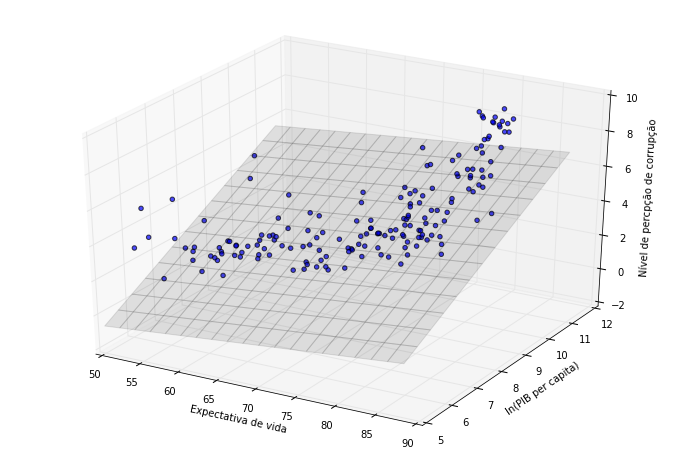

In [49]:
#Linear Regression - PRIMEIRA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Escreve modelo como no R

model = sm.ols(formula='corruption ~ lnGdp + life', data = dados)
fit = model.fit()
fit.summary()

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

x_surf = np.arange(50, 90, 2)                # generate a mesh
y_surf = np.arange(5, 12, 0.5)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

exog = pd.core.frame.DataFrame({'life': x_surf.ravel(), 'lnGdp': y_surf.ravel()})
out = fit.predict(exog = exog)
ax.plot_surface(x_surf, y_surf,
                out.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.1)



ax.scatter(dados['life'], dados['lnGdp'], dados['corruption'],
           c='blue',
           marker='o',
           alpha=0.7)

ax.set_xlim(50,90)
ax.set_ylim(5,12)
# ax.set_zlim(1,10)
ax.set_xlabel('Expectativa de vida')
ax.set_ylabel('ln(PIB per capita)')
ax.set_zlabel('Nível de percpção de corrupção')

In [54]:
#Linear Regression - SEGUNDA MANEIRA DE FAZER REGRESSÃO USANDO PACOTE ols
#Informando X como matriz de planejamento

#Montagem dos dados
y=dados.corruption
X=dados.iloc[:,(1,3)]
X=sm1.add_constant(X)  # Adds a constant term to the predictor
X.head()

model=sm1.OLS(y, X)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             corruption   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     90.96
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           1.53e-27
Time:                        15:03:28   Log-Likelihood:                -308.76
No. Observations:                 172   AIC:                             623.5
Df Residuals:                     169   BIC:                             633.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -7.3922      0.899     -8.220      0.000        -9.168    -5.617
life           0.0395      0.021      1.918      0.057        -0.001     0.080
lnGdp          0.9563      0.146      6.572      0.000         0.669     1.244
==============================================================================
Omnibus:                        3.464   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.177   Jarque-Bera (JB):                3.271
Skew:                           0.274   Prob(JB):                        0.195
Kurtosis:                       2.605   Cond. No.                         573.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusão da análise de regressão 

Primeiramente, observando o **r ao quadradado**. Esse parâmetro, indica a porcentagem do nosso modelo que pode ser descrito pelas variáveis regressoras em relação a média. Basicamente, um r^2 acima de 50% indica que o modelo está bem ajustado pelas variáveis escolhidas. No nosso caso, obtivemos um r^2 de 0.518, com ele ajustado para 0.513. Seu ajuste checa pela existência de alguma variável desnecessária. Se o ajuste for muito baixo, há grandes chances de haver alguma variável regressora que não influencia na resposta. Esse não foi o caso.

A próxima análise é em relação aos coeficientes. Nossa equação de reta é:

$$ NívelPercepçãoCorrupção = \beta_0 + \beta_1 ln(PIB) + \beta_2 ExpectativaDeVida$$

**O teste de regressão fornece a seguinte equação, com os parâmetros ajustados:**

$$ NívelPercepçãoCorrupção = -7.392 + 0.956 ln(PIB) + 0.0395 ExpectativaDeVida$$

#### Interpretação dos coeficientes
**1. Intercepto: -7.392**

Se hipoteticamente houvese um país cujo ln(PIB) e a expectativa de vida fossem nulos, o nível de percepção de corrupção seria -7.392. Isso significa que quando os dois indíces tendem a zero, o país é considerado muito corrupto (quanto menor o índice, mais corrupto o país é). Como não é possível obter uma expectativa de vida e um PIB próximos de zero no contexto global, essa informação não é relevante.

**2. beta_1 = 0.956**

A cada aumento de 1% no PIB per capita, há um aumento previsto de 0.000098 no índice de percepção de corrupção. A fórmula usada está representada abaixo: 
<img src="formula.png">
Utilizamos um PIB de 40.000 com variação de 1%, 400.

**2. beta_2 = 0.0395**

A cada aumento de cinco anos na expectativa de vida, temos um aumento de 0.1975 no índice de percepção de corrupção.

#### Hipóteses 
**H_0 Prob(F_statistic) = 0** => o modelo é melhor descrito pela média das variáveis 

**H_1 Prob(F_statistic) ≠ 0** => o modelo é bem descrito pela reta encontrada no teste de regressão 

A probabilidade do F-statistic é muito baixa. Isso significa dizer que a probabilidade da hipótese nula estar certa é muito baixa. Logo, há grandes chances de que a reta equacionada acima estime bem o comportamento do modelo.

Como as variáveis regressoras não apresentam seus respectivos P>|t| muito diferentes de 0, chegamos a conclusão de que não há nenhuma variável pouco significativa em nosso modelo de regressão.

### Conclusão

Após realizar as análises acima, percebemos que o modelo de regressão realizado descreve bem as relações entre a variável resposta e as variáveis regressoras. Dessa forma, concluimos que o nível de percepção de corrupção é afetado pelo nível de desenvolvimento de um país, considerando que esse desenvolvimento é descrito através das duas vari

In [ ]:
O nível de percepção de corrupção é afetado pelo nível de desenvolvimento de um país?